# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Esercizio 08.1 - Soluzione proposta

Nell'esercizio proposto si è sfruttato l'algoritmo di Metropolis, illustrato nell'**Esercizio 06.1**, per stimare $|\psi_T^{\sigma, \mu} (x) |^2 $ e $\langle \hat{H} \rangle$. Si campiona dunque una nuova coordinata $x_{new}$ con una probabilità di transizione uniforme:
$$ x_{new} = x_{old} + \delta r $$

Dove $r$ è un numero pseudocasuale uniformemente distribuito in $[-1, 1]$ e $\delta$ è l'ampiezza dell'intervallo da esplorare.
Nello spirito dell'_importance sampling_, impiegato anche nell'**Esercizio 02.1**, si definisce la probabilità di accettazione della mossa di Metropolis come $A = \min[1, p]$, dove $p$ è:
$$p = \displaystyle{ \frac{ |\psi_T^{\sigma, \mu} (x_{new}) |^2}{|\psi_T^{\sigma, \mu} (x_{old}) |^2} }$$

Il valor medio dell'Hamiltoniana è dunque stimato calcolando esplicitamente l'energia cinetica e l'energia potenziale, normalizzate sulla funzione d'onda $\psi_T^{\sigma, \mu} (x) $, e ricavando la media a blocchi della loro somma, utilizzando $100$ blocchi da $10000$ passi. Le espressioni analitiche di $E_{kin}$ ed $E_{pot}$ sono:

- $E_{kin} = -\displaystyle{\frac{\hbar^2}{2m}} \left( \displaystyle{e^{-\frac{(x - \mu)^2}{2\sigma^2} } \frac{ \left( \frac{x - \mu}{\sigma} \right)^2 - 1 }{\sigma^2}} + \displaystyle{e^{-\frac{(x + \mu)^2}{2\sigma^2} } \frac{ \left( \frac{x + \mu}{\sigma} \right)^2 - 1 }{\sigma^2}} \right)$
- $E_{pot} = \left( x^4 - \displaystyle{\frac{5}{2}} x^2 \right) \psi_T^{\sigma, \mu} (x)$

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

### Esercizio 08.2 - Soluzione proposta

Nell'esercizio proposto, si è impiegato un algoritmo di _Simulated Annealing_ per ottenere la coppia $(\mu, \sigma)$ che minimizza $\langle \hat{H} \rangle$, fornendo dunque una stima dell'energia dello stato fondamentale del sistema.

Il _Simulated Annealing_ prende ispirazione da un processo naturale in cui un liquido raffreddato molto lentamente si porta spontaneamente in uno stato di energia minima, costituendo un cristallo puro completamente ordinato. 

Il problema di ottimizzazione affrontato è dunque stato modellizzato con un processo di _SA_; in primo luogo, si è definita una legge di raffreddamento per il sistema:
$$T_{new} = \alpha T_{old}, \quad \alpha = 0.9 $$
Si è scelta una funzione esponenziale in modo che $T$ non decrescesse bruscamente, ma anche in modo che il processo di ricerca dei parametri ottimali non richiedesse un tempo computazionale troppo lungo.

Partendo quindi da una temperatura e da una coppia di parametri iniziali $ \{ T_{old}, (\mu, \sigma)_{old} \}$, si è stimata $\langle \hat{H} \rangle$ con il metodo descritto nell'**Esercizio 08.1**; si è quindi esplorato lo spazio dei parametri con una probabilità di transizione uniforme, spostandosi di poco da $(\mu, \sigma)_{old}$:
- $\mu_{new} = \mu_{old} + \delta r$
- $\sigma_{new} = \sigma_{old} + \delta r$

Con $r$ numero pseudocasuale estratto uniformemente in $[-1, 1]$ e $\delta$ ampiezza arbitraria fissata a $0.1$.

Si è dunque stimata nuovamente $\langle \hat{H} \rangle$, utilizzando però la coppia $(\mu, \sigma)_{new}$; i nuovi parametri sono stati accettati o rifiutati sfruttando un algoritmo di Metropolis, con probabilità di accettazione $A = \min[1, p]$ dipendente dal peso di Boltzmann:
$$ p = \displaystyle{ e^{ - \beta ( E_{new} - E_{old} ) } } $$

Dove:
- $E_{new} = \langle \hat{H} \rangle $ per il set di parametri $(\mu, \sigma)_{new}$
- $E_{old} = \langle \hat{H} \rangle $ per il set di parametri $(\mu, \sigma)_{old}$

In caso di accettazione della mossa di Metropolis, si sono assegnati $(\mu, \sigma)_{new}$ come valori iniziali dei parametri; in caso contrario, si è mantenuta la coppia $(\mu, \sigma)_{old}$. Il processo è stato dunque iterato variando $T$, fino ad arrivare a una temperatura finale $T_{fin}$, in corrispondenza della quale, per processi di raffreddamento ergodici, si trova la coppia $(\mu, \sigma)$ che minimizza l'energia.

Il processo descritto è stato effettuato partendo da una configurazione iniziale di temperatura e patrametri:
- $T_{in} = 5 \ \mathrm{K}$
- $\mu_{in} = 0.2 $
- $\sigma_{in} = 0.8 $

Arrivando a $T_{fin} = 10^{-10} \ \mathrm{K} $.

Gli andamenti dell'energia $\langle \hat{H} \rangle$, di $\mu$ e di $\sigma$ in funzione del numero di iterazioni del processo di _Simulated Annealing_ sono riportati nei grafici seguenti.

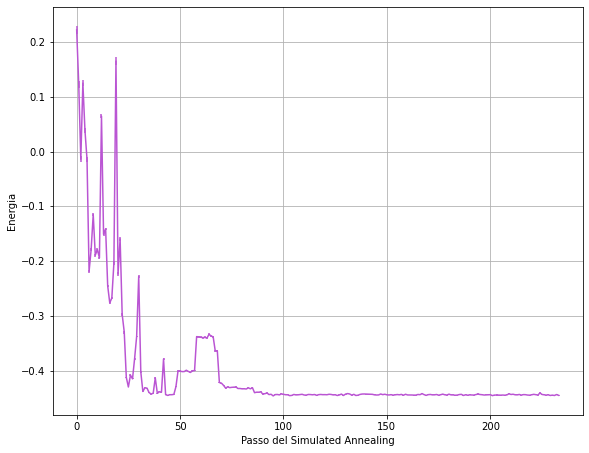


L'energia dello stato fondamentale, raggiunta durante il processo di raffreddamento del _Simulated Annealing_, risulta essere:
- $E_0$ = -0.444616


In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es8/SA_Energy') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
        err_prog = [float(line.split()[2]) for line in lines]
        
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Passo del Simulated Annealing')
plt.ylabel('Energia')
plt.grid(True)
plt.show()

md_text = f"""
L'energia dello stato fondamentale, raggiunta durante il processo di raffreddamento del _Simulated Annealing_, risulta essere:
- $E_0$ = {sum_prog[-1]}
"""

md_cell = get_ipython().run_cell_magic('markdown', '', md_text)

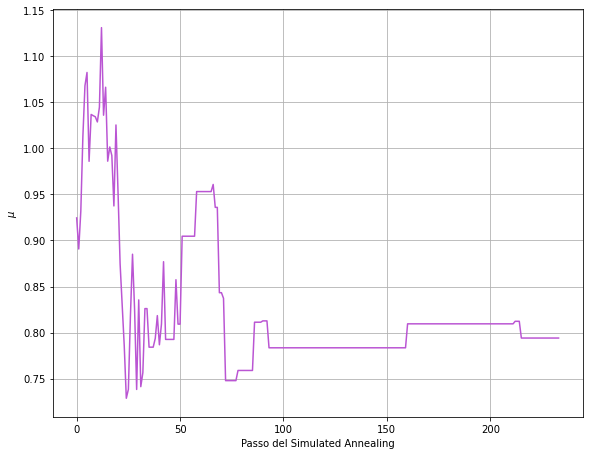

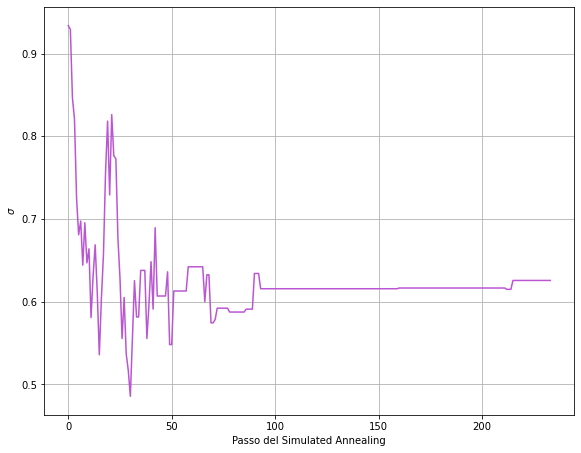


I migliori parametri $\mu$ e $\sigma$, ricavati dal _Simulated Annealing_, risultano essere:
- $\mu$ = 0.794008
- $\sigma$ = 0.625747


In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es8/SA_Parameters') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        mean = [float(line.split()[1]) for line in lines]
        sigma = [float(line.split()[2]) for line in lines]

best_mi = mean[-1]
best_sigma = sigma[-1]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, mean, color = 'mediumorchid')
plt.xlabel('Passo del Simulated Annealing')
plt.ylabel('$\mu$')
plt.grid(True)
plt.show()

plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sigma, color = 'mediumorchid')
plt.xlabel('Passo del Simulated Annealing')
plt.ylabel('$\sigma$')
plt.grid(True)
plt.show()


md_text = f"""
I migliori parametri $\mu$ e $\sigma$, ricavati dal _Simulated Annealing_, risultano essere:
- $\mu$ = {best_mi}
- $\sigma$ = {best_sigma}
"""

md_cell = get_ipython().run_cell_magic('markdown', '', md_text)


In seguito è riportato l'andamento della ricerca di $\mu$ e $\sigma$ nello spazio dei parametri.

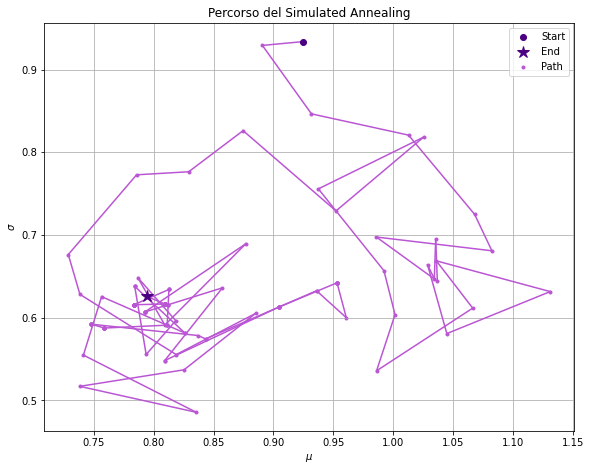

In [9]:
plt.figure(figsize=(9.5, 7.5))

temp, mu, sigma = np.loadtxt("Es8/SA_Parameters", unpack=True)

# Plot scatter plot with colors based on 'temp'
plt.scatter(mu, sigma, marker='.', linestyle="-", label="Path", color = "mediumorchid")

# Connect successive points with lines
for i in range(len(temp) - 1):
    plt.plot([mu[i], mu[i+1]], [sigma[i], sigma[i+1]], color="mediumorchid")

plt.plot(mu[0], sigma[0], marker='.', markersize=12, color="indigo", label="Start", linestyle="")
plt.plot(mu[-1], sigma[-1], marker='*', markersize=12, color="indigo", label="End", linestyle="")

plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title('Percorso del Simulated Annealing')

plt.legend()
plt.grid(True)
plt.show()

Per la coppia di migliori parametri ottenuta si è eseguita una stima di $\langle \hat H \rangle$, tramite una media a blocchi di $100$ blocchi da $10000$ elementi.

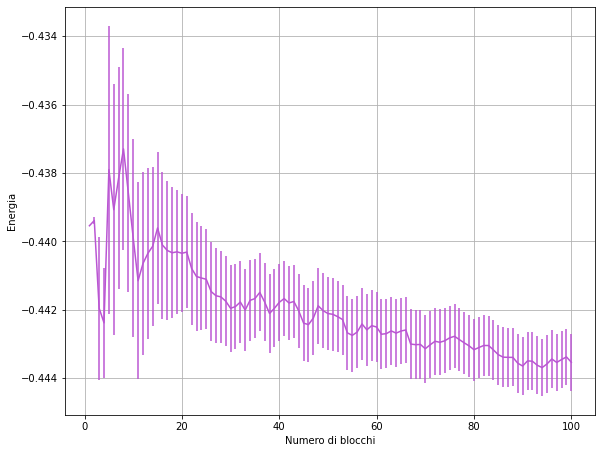

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es8/Energy_Metro') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[2]) for line in lines]
        err_prog = [float(line.split()[3]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, err_prog, color = 'mediumorchid')
plt.xlabel('Numero di blocchi')
plt.ylabel('Energia')
plt.grid(True)
plt.show()

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

In conclusione, si è graficato l'andamento della densità di probabilità $| \psi_T^{\sigma, \mu} |^2 $ per la coppia di migliori parametri ottenuti. 

Per la stima numerica di tale funzione si è scelto un numero di _bin_, $n_{bin} = 100$, in cui suddividere l'intervallo $[-3, 3]$: si sono dunque ottenuti $n_{bin}$ sottointervalli di dimensione $d = 6/n_{bin}$ ; si sono poi effettuati $M = 100000$ _sampling_ della coordinata $x$ con il processo illustrato nell'**Esercizio 08.1**, incrementando di $1$ il contatore corrispondente al sottointervallo $[x, x + d]$, tenendo conto soltanto delle $x$ che ricadono in $[-3, 3]$ (per la probabilità di transizione scelta, nessuna $x$ cade al di fuori di tale _range_).

Ciascun contatore è stato poi normalizzato con il valor medio di dati contenuti in ogni _bin_, ossia $1000$, e con l'ampiezza dell'intervallo. 



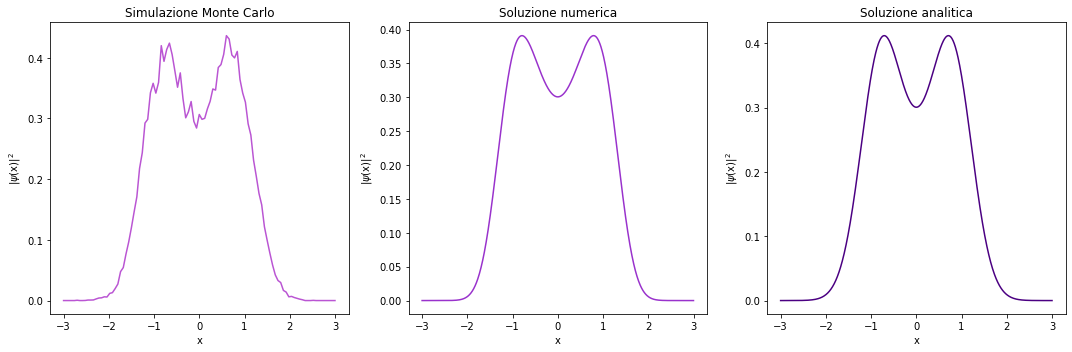


L'energia dello stato fondamentale, calcolata tramite l'equazione di Schrodinger in forma matriciale, risulta essere:
- $E_0$ = -0.460458450800843


In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

with open('Es8/PsiSquareHistogram') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        y = [float(line.split()[1]) for line in lines]

axes[0].plot(x, y, color='mediumorchid')
axes[0].set_title('Simulazione Monte Carlo')


def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

def PsiSquare(x):
    return (np.exp(-(x-best_mi)**2/(2.0 * best_sigma**2)) + np.exp(-(x+best_mi)**2/(2.0 * best_sigma**2)))**2

hbar = 1
m = 1
a = 6 #stiamo tra -3 e 3
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

# Sovrapposizione dei plot
axes[1].plot(x, psi[0]**2, color='darkorchid')
axes[1].set_title('Soluzione numerica')

axes[2].plot(x, PsiSquare(x)/( a*np.mean(PsiSquare(x)) ), color = 'indigo')
axes[2].set_title('Soluzione analitica')

axes[0].set_xlabel('x')
axes[0].set_ylabel('|$\psi$(x)|$^2$')
axes[1].set_xlabel('x')
axes[1].set_ylabel('|$\psi$(x)|$^2$')
axes[2].set_xlabel('x')
axes[2].set_ylabel('|$\psi$(x)|$^2$')

plt.tight_layout()
plt.show()

md_text = f"""
L'energia dello stato fondamentale, calcolata tramite l'equazione di Schrodinger in forma matriciale, risulta essere:
- $E_0$ = {E[0]}
"""

md_cell = get_ipython().run_cell_magic('markdown', '', md_text)